
# EDA · Saber Pro 2021 — Universidad Mariana · Ingeniería de Sistemas (SNIES 2445)

Este cuaderno realiza un **Análisis Exploratorio de Datos (EDA)** profesional sobre los microdatos de **Saber Pro 2021**, con enfoque exclusivo en los estudiantes de **Universidad Mariana** matriculados en **Ingeniería de Sistemas** (código **SNIES 2445**).

**Objetivo dentro del TFM:** generar la **línea de salida** (desempeño al egreso) que luego se cruzará con la **línea de entrada** (Saber 11) para estimar **Valor Agregado (VA)** y **Contribución Relativa (CR)** del programa.


In [1]:

import os
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True
})

print("Librerías cargadas correctamente")

Librerías cargadas correctamente



## 1) Selección del archivo de datos

En lugar de fijar un nombre, se abrirá un cuadro de diálogo para seleccionar el archivo TXT de Saber Pro 2020.  
Así evitamos errores de "archivo no encontrado".


In [2]:

# Ruta fija del archivo Saber Pro 2020
file_path = "Examen_Saber_Pro_Genericas_2021.txt"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta: {file_path}")

print("Archivo seleccionado:", file_path)

# Columnas de interés
COLS = [
    "estu_inst_departamento","inst_nombre_institucion","inst_cod_institucion","inst_origen","inst_caracter_academico",
    "estu_prgm_academico","estu_snies_prgmacademico","estu_nivel_prgm_academico",
    "estu_depto_presentacion","estu_mcpio_presentacion","estu_zona_presentacion",
    "estu_genero","fami_estratovivienda",
    "estu_horassemanatrabaja","estu_pagomatriculabeca","estu_pagomatriculacredito",
    "estu_pagomatriculapadres","estu_pagomatriculapropio",
    "mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
    "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global",
]

# Lectura del archivo
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)
keep = [c for c in COLS if c in df.columns]
df = df[keep].copy()

print("Dimensiones iniciales:", df.shape)
df.head(3)


Archivo seleccionado: Examen_Saber_Pro_Genericas_2021.txt
Dimensiones iniciales: (253568, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
0,BOGOTÃ,UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÃ D.C.,1101.0,OFICIAL NACIONAL,UNIVERSIDAD,INGENIERÃA DE SISTEMAS Y COMPUTACIÃN,106661.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,No,Si,205,300,186,202.0,220,223.0,100.0
1,BOGOTÃ,UNIVERSIDAD DE LOS ANDES-BOGOTÃ D.C.,1813.0,NO OFICIAL - CORPORACIÃN,UNIVERSIDAD,ADMINISTRACION DE EMPRESAS,1536.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,Si,No,178,181,123,218.0,193,179.0,90.0
2,SANTANDER,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,1723.0,NO OFICIAL - FUNDACIÃN,UNIVERSIDAD,INGENIERIA CIVIL,2524.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,Si,No,174,193,139,197.0,168,174.0,87.0



## 2) Limpieza y normalización

- Conversión de puntajes a numéricos.  
- Normalización de textos (mayúsculas, sin tildes).  
- Eliminación de duplicados.


In [3]:

# 2.1 Conversión de puntajes
score_cols = ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
              "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global"]
for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 2.2 Normalización de texto
def norm_text(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.replace("\xa0"," ", regex=False).str.strip()
    s = s.apply(lambda x: "".join(ch for ch in unicodedata.normalize("NFKD", x) if not unicodedata.combining(ch)))
    return s.str.upper()

for c in ["inst_nombre_institucion","estu_prgm_academico","inst_origen",
          "inst_caracter_academico","estu_genero","fami_estratovivienda","estu_inst_departamento",]:
    if c in df.columns:
        df[c] = norm_text(df[c])

# 2.3 Duplicados
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))
df.info()

Duplicados eliminados: 1
<class 'pandas.core.frame.DataFrame'>
Index: 253567 entries, 0 to 253567
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   estu_inst_departamento     253567 non-null  object 
 1   inst_nombre_institucion    253567 non-null  object 
 2   inst_cod_institucion       248540 non-null  float64
 3   inst_origen                253567 non-null  object 
 4   inst_caracter_academico    253567 non-null  object 
 5   estu_prgm_academico        253567 non-null  object 
 6   estu_snies_prgmacademico   248540 non-null  float64
 7   estu_nivel_prgm_academico  248540 non-null  object 
 8   estu_depto_presentacion    253565 non-null  object 
 9   estu_mcpio_presentacion    253565 non-null  object 
 10  estu_genero                253567 non-null  object 
 11  fami_estratovivienda       253567 non-null  object 
 12  estu_horassemanatrabaja    242640 non-null  object 
 13  estu_pago


## 3) Filtro del universo de análisis

Se seleccionan únicamente estudiantes de **Universidad Mariana** y del programa **Ingeniería de Sistemas (SNIES 2445)**.


In [4]:

# Filtro por SNIES si está disponible
mask_snies = False
if "estu_snies_prgmacademico" in df.columns:
    mask_snies = df["estu_snies_prgmacademico"].astype(str).str.strip() == "2445"

# Filtro por nombre (respaldo)
inst_ok = df.get("inst_nombre_institucion", pd.Series(dtype=str)).str.contains("UNIVERSIDAD MARIANA", na=False)
prog_ok = df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("INGENIER", na=False) &           df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("SISTEM", na=False)

if isinstance(mask_snies, pd.Series) and mask_snies.any():
    df_mariana = df[mask_snies].copy()
else:
    df_mariana = df[inst_ok & prog_ok].copy()

print("Filas tras filtro (Mariana · Ing. Sistemas):", df_mariana.shape)
df_mariana.head(3)

Filas tras filtro (Mariana · Ing. Sistemas): (47, 24)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
131481,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,Si,No,128,189,172,153.0,173,163.0,76.0
131482,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,No,No,117,139,125,155.0,124,132.0,32.0
131483,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720.0,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,Si,Si,116,99,0,121.0,76,82.0,1.0



## 4) Chequeos de calidad de puntajes


In [5]:

# Nulos
nulls = df_mariana[score_cols].isna().mean().sort_values(ascending=False).to_frame("pct_null")
display((nulls*100).round(2))

# Rango de puntajes
rng = pd.DataFrame({"min": df_mariana[score_cols].min(), "max": df_mariana[score_cols].max()})
display(rng)

,pct_null
mod_lectura_critica_punt,0.0
mod_razona_cuantitat_punt,0.0
mod_comuni_escrita_punt,0.0
mod_ingles_punt,0.0
mod_competen_ciudada_punt,0.0
punt_global,0.0
percentil_global,0.0


,min,max
mod_lectura_critica_punt,95.0,300.0
mod_razona_cuantitat_punt,87.0,230.0
mod_comuni_escrita_punt,0.0,300.0
mod_ingles_punt,107.0,221.0
mod_competen_ciudada_punt,72.0,223.0
punt_global,82.0,224.0
percentil_global,1.0,100.0



## 5) Estadísticos descriptivos


In [6]:

desc = df_mariana[score_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
mod_lectura_critica_punt,47.0,147.000000,34.599573,95.0,124.0,141.0,160.0,300.0
mod_razona_cuantitat_punt,47.0,154.702128,30.611105,87.0,139.5,163.0,171.0,230.0
mod_comuni_escrita_punt,47.0,139.170213,47.159452,0.0,119.0,140.0,166.0,300.0
mod_ingles_punt,47.0,160.787234,21.772476,107.0,152.5,161.0,170.0,221.0
mod_competen_ciudada_punt,47.0,149.553191,28.907505,72.0,134.0,151.0,170.0,223.0
punt_global,47.0,150.255319,26.301321,82.0,138.5,152.0,162.5,224.0
percentil_global,47.0,57.404255,25.734142,1.0,41.5,61.0,75.5,100.0



## 6) Perfil sociodemográfico y formas de financiación


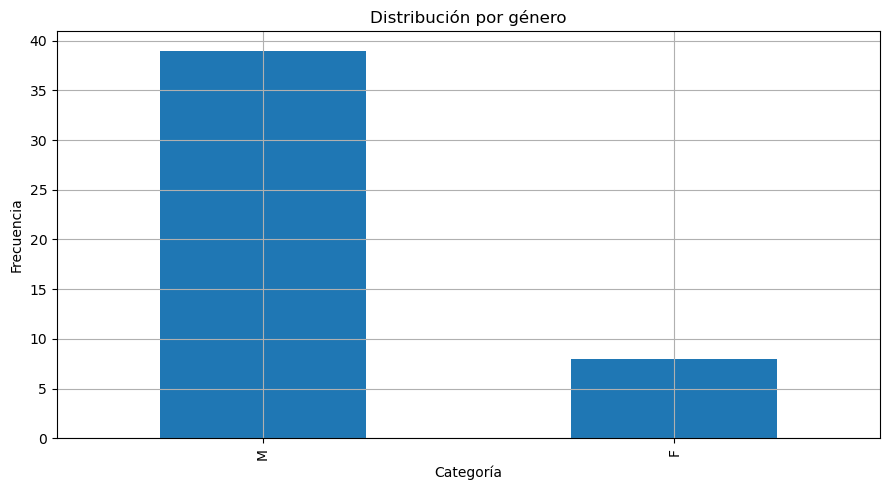

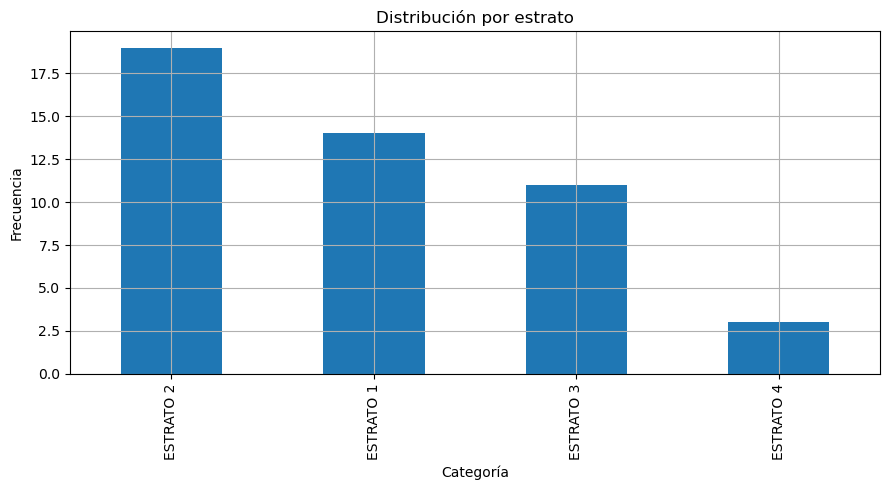

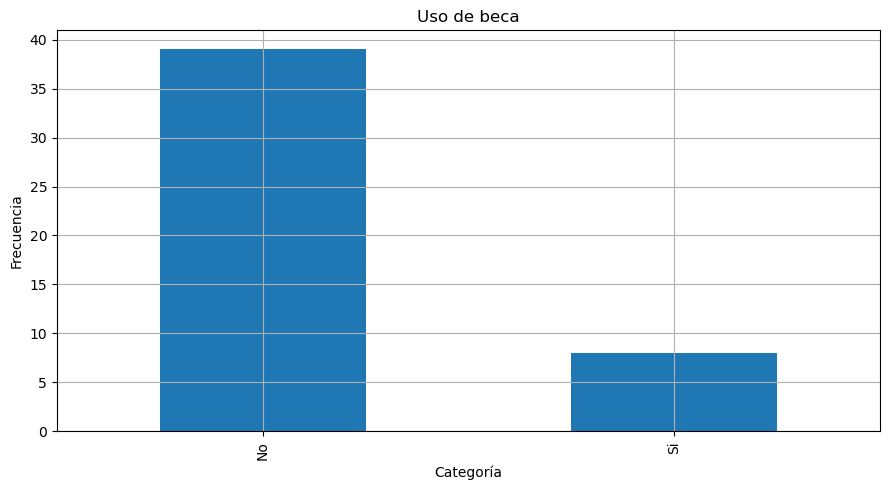

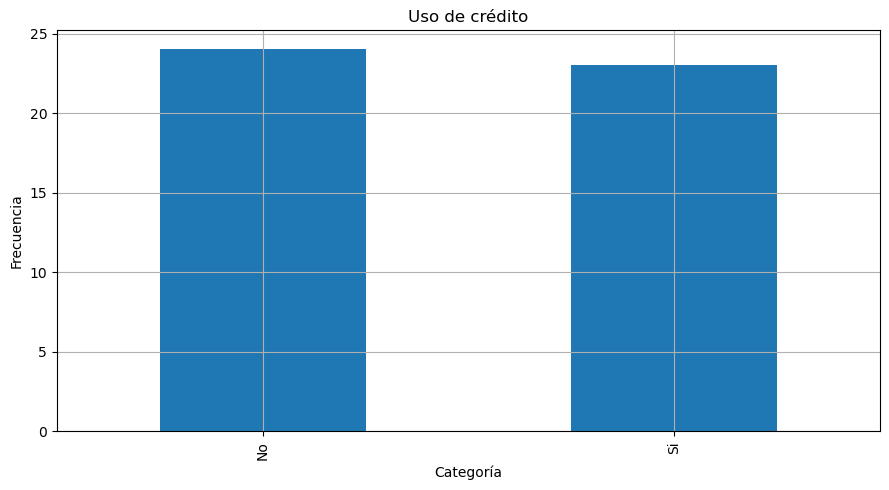

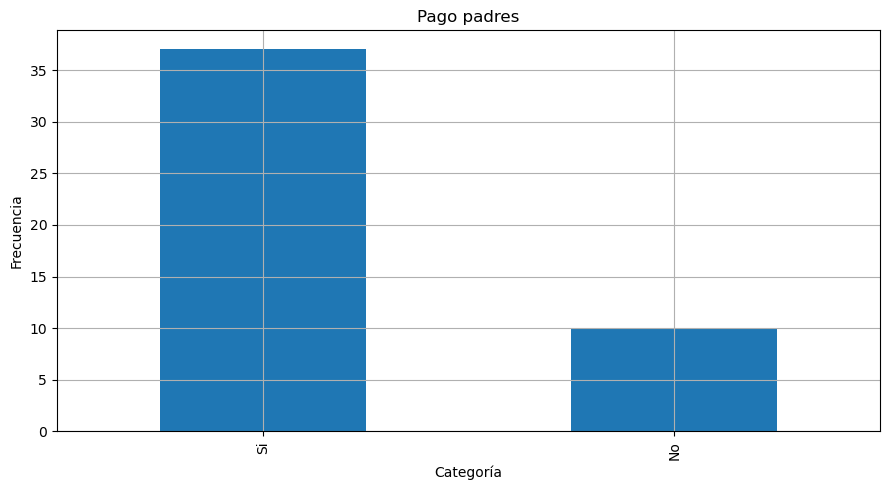

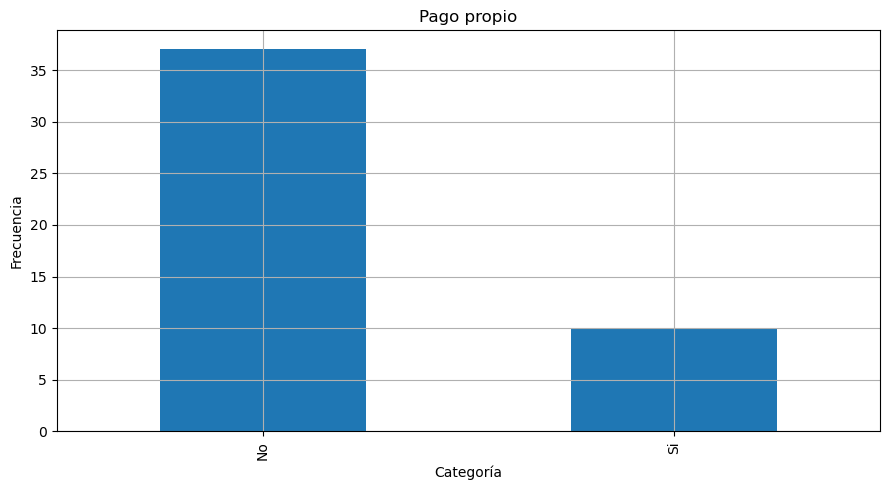

In [7]:

def plot_bar_counts(series, title):
    vc = series.value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

if "estu_genero" in df_mariana.columns:
    plot_bar_counts(df_mariana["estu_genero"], "Distribución por género")

if "fami_estratovivienda" in df_mariana.columns:
    plot_bar_counts(df_mariana["fami_estratovivienda"], "Distribución por estrato")

for paycol, title in [("estu_pagomatriculabeca","Uso de beca"),
                      ("estu_pagomatriculacredito","Uso de crédito"),
                      ("estu_pagomatriculapadres","Pago padres"),
                      ("estu_pagomatriculapropio","Pago propio")]:
    if paycol in df_mariana.columns:
        plot_bar_counts(df_mariana[paycol], f"{title}")

### Resultados del análisis

En el análisis de las fuentes de financiamiento y características sociodemográficas de los estudiantes, se observa que la mayoría no financia sus estudios con recursos propios, lo que evidencia una fuerte dependencia de otras alternativas de pago. En este sentido, el principal apoyo proviene de los padres, quienes en la mayoría de los casos asumen directamente el costo de la educación, mientras que una minoría de estudiantes manifiesta no contar con este respaldo. 

En cuanto al uso del crédito educativo, se presenta un equilibrio entre quienes lo utilizan y quienes no, lo que sugiere que este mecanismo constituye un recurso complementario, pero no mayoritario dentro de la muestra. Por otro lado, el acceso a becas es muy limitado, pues la mayor parte de los estudiantes no cuenta con este beneficio, lo que refleja barreras en el acceso a apoyos institucionales o gubernamentales.  

En relación con el nivel socioeconómico, la distribución por estrato muestra una concentración en los estratos 1 y 2, siendo el estrato 2 el de mayor frecuencia, seguido por el estrato 1, con presencia moderada del estrato 3 y una participación mínima del estrato 4. Este panorama indica que la población estudiantil analizada proviene principalmente de contextos socioeconómicos bajos. 

Finalmente, en la distribución por género se evidencia una clara predominancia del masculino frente al femenino, lo cual pone de manifiesto una desigualdad en la representación de género dentro de la muestra.  

En conjunto, los resultados permiten concluir que el financiamiento de la educación se sostiene principalmente en los padres, que el crédito educativo cumple un papel intermedio, mientras que el pago propio y las becas tienen una presencia marginal. Además, la mayoría de estudiantes pertenece a estratos socioeconómicos bajos y la población está caracterizada por una mayor participación de hombres que de mujeres.  



## 7) Distribución de puntajes


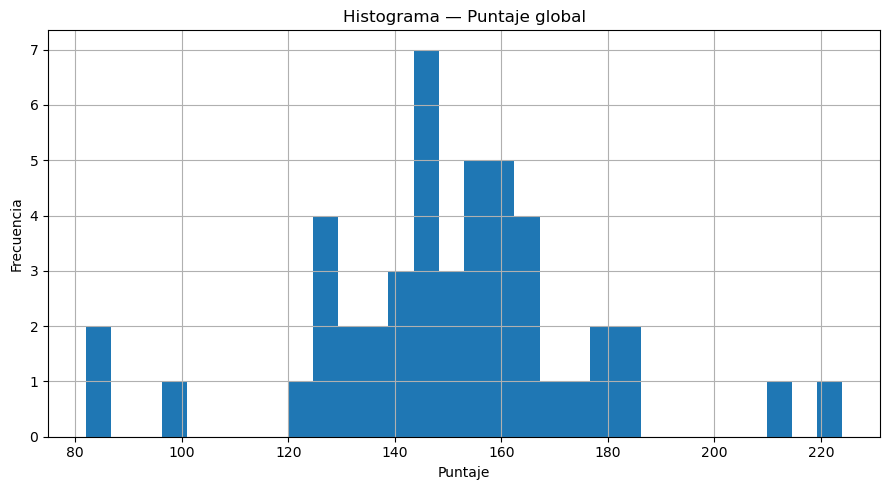

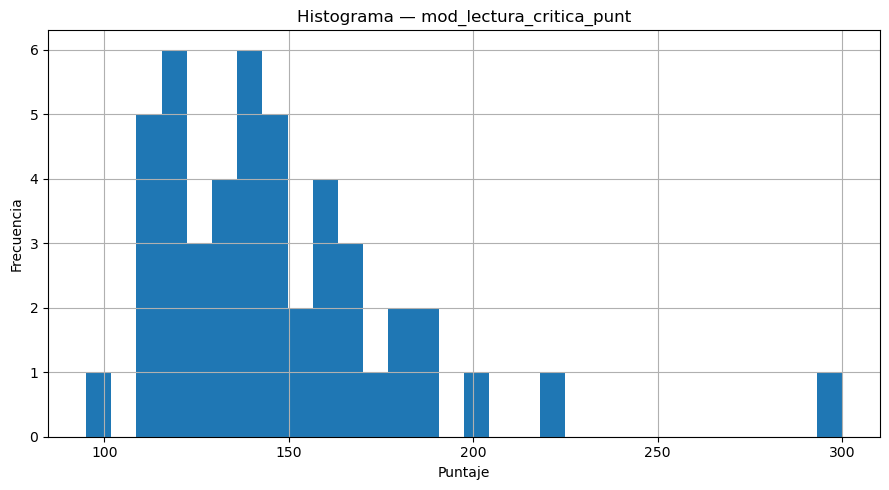

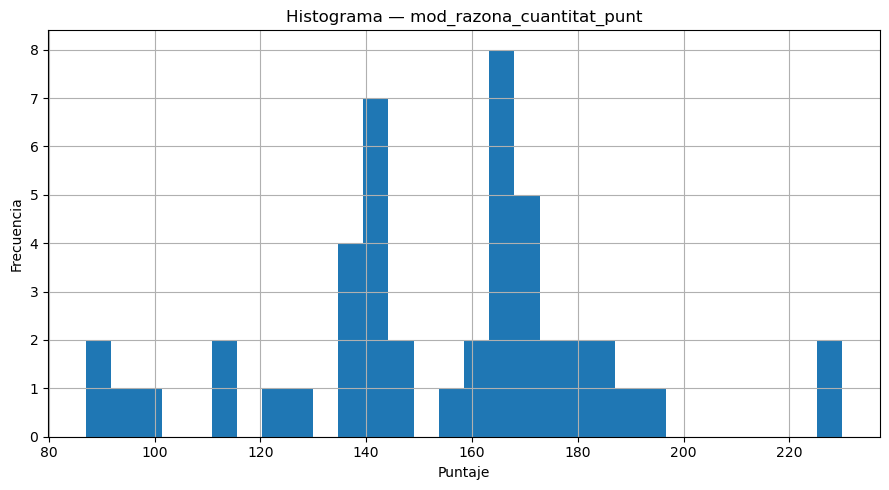

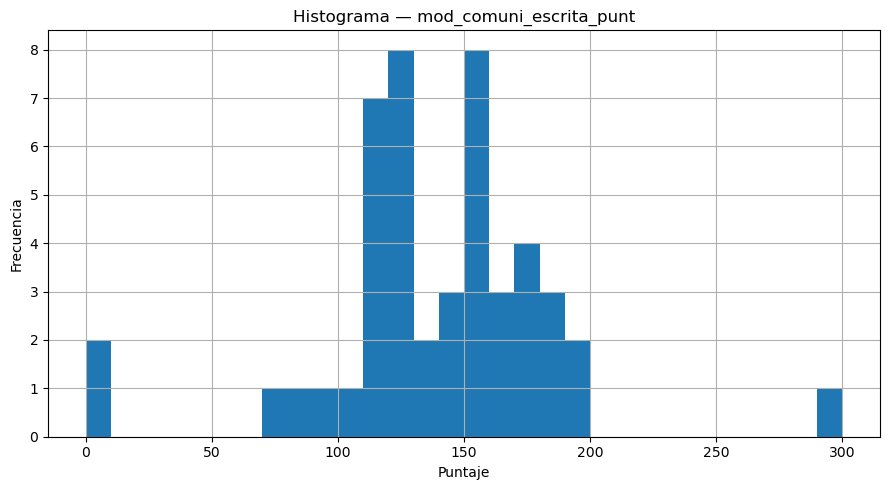

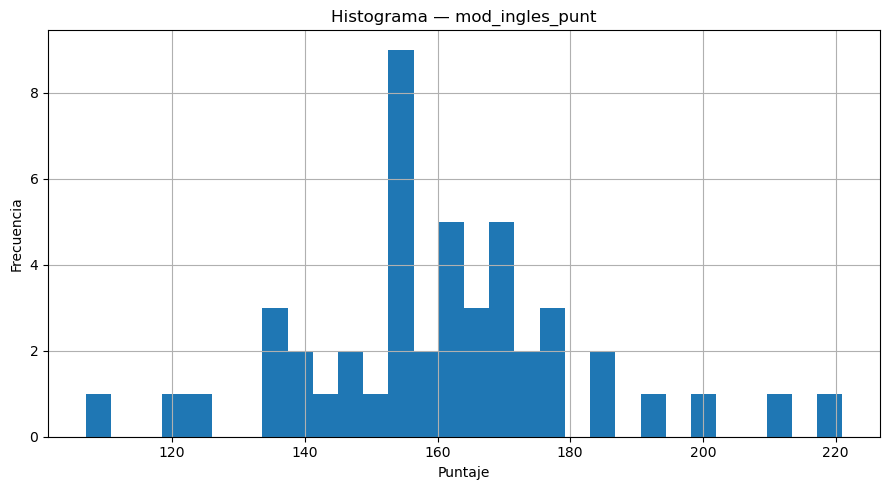

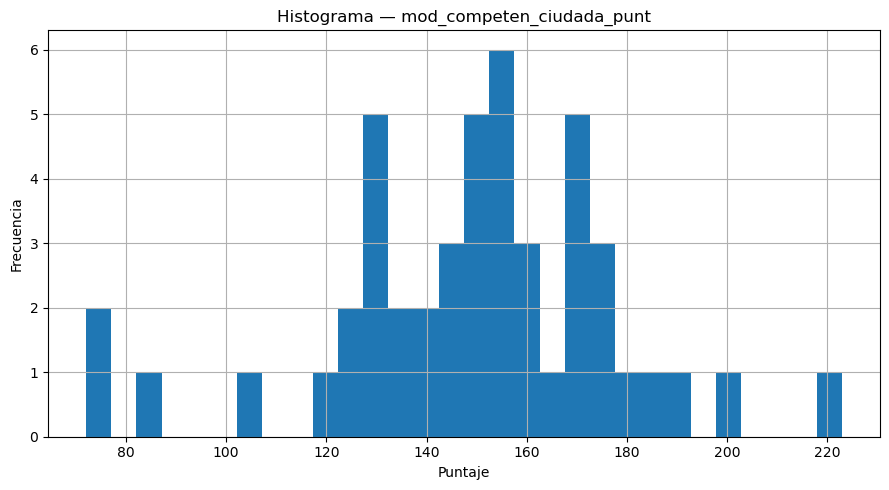

In [8]:

def hist_score(df_, col, title):
    if col in df_.columns and df_[col].notna().any():
        plt.figure()
        df_[col].dropna().plot(kind="hist", bins=30)
        plt.title(title)
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

hist_score(df_mariana, "punt_global", "Histograma — Puntaje global")
for c in ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
          "mod_ingles_punt","mod_competen_ciudada_punt"]:
    hist_score(df_mariana, c, f"Histograma — {c}")

### Resultados de los histogramas de puntajes

Al analizar la distribución de los puntajes en las diferentes áreas evaluadas, se observa que el **puntaje global** se concentra principalmente entre 130 y 170 puntos, con una mayor frecuencia alrededor de 140-150. Esto indica que la mayoría de los estudiantes se ubican en un rango medio de desempeño, con algunos casos aislados de puntajes más bajos (80-100) y algunos más altos (superiores a 200).

En el área de **lectura crítica**, la distribución presenta mayor dispersión, con concentraciones entre 110 y 160 puntos, aunque existen valores extremos que llegan hasta 300. Este comportamiento sugiere que, si bien la mayoría de los estudiantes se ubica en un rango medio, algunos alcanzan desempeños muy destacados.

En el componente de **razonamiento cuantitativo**, la mayoría de los puntajes se concentra en el intervalo de 140 a 170, con un pico marcado en torno a los 160 puntos. Sin embargo, también se observan puntajes por debajo de 100 y algunos que superan los 220, lo cual refleja heterogeneidad en el nivel de dominio matemático.

La **comunicación escrita** muestra una concentración importante en el rango de 110 a 170 puntos, con algunas frecuencias altas en torno a los 130-150. No obstante, también se evidencian casos atípicos con puntajes muy bajos cercanos a cero y algunos cercanos a 300, lo cual indica una gran variabilidad en las competencias de escritura.

En cuanto a la **prueba de inglés**, los puntajes se agrupan principalmente entre 140 y 170, con un pico alrededor de los 155 puntos. Existen algunos valores atípicos que superan los 200, lo que sugiere que una pequeña proporción de estudiantes alcanza desempeños más altos en esta área.

Finalmente, en el módulo de **competencias ciudadanas**, la mayoría de los resultados se concentra entre 130 y 170 puntos, con mayor frecuencia en torno a los 150-160. De manera similar a las demás áreas, se observan puntajes bajos cercanos a 80 y algunos altos que superan los 200, lo que denota diversidad en el dominio de esta competencia.

En conjunto, los histogramas muestran que la mayoría de los estudiantes se concentra en rangos medios de puntaje en todas las áreas, aunque se observan diferencias importantes en la dispersión y presencia de valores extremos, especialmente en lectura crítica y comunicación escrita, donde se presentan desempeños tanto muy bajos como muy altos.



## 8) Exportación de datos limpios


In [ ]:
from pathlib import Path

# Carpeta de salida
out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Archivo destino
out_file = out_dir / "spro_mariana_sistemas_2020.csv"

# Guardar df_mariana directamente
df_mariana.to_csv(str(out_file), index=False, encoding="utf-8-sig")
print("✅ Guardado:", out_file)


✅ Guardado: C:\Temp\spro_2020_tfm_outputs\spro_mariana_sistemas_2020.csv


In [9]:
import re, unicodedata
import pandas as pd
from pathlib import Path

# --- helpers de limpieza robusta ---
def fix_mojibake(s):
    """Intenta corregir texto corrupto (utf8/latin1)."""
    if pd.isna(s): 
        return s
    s = str(s)
    # intento 1: típico latin1->utf8
    try:
        return s.encode('latin1').decode('utf-8')
    except Exception:
        pass
    return s

def deaccent_upper(s):
    if pd.isna(s): return s
    s = str(s).upper().strip()
    # quita diacríticos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) 
                if unicodedata.category(c) != 'Mn')
    # colapsa espacios
    s = ' '.join(s.split())
    return s

def clean_depto(s):
    """Normaliza departamento; repara variantes de NARIÑO."""
    if pd.isna(s): return s
    s0 = fix_mojibake(s)
    s1 = deaccent_upper(s0)  # NARIÑO -> NARINO
    # repara casos 'NARIA?O' (carácter raro entre A y O)
    if re.fullmatch(r'NARIA\W?O', s1):
        return 'NARINO'
    # algunos datasets dejan basura no ASCII; homologa
    if s1 in {'NARINO','NARIN0','NARINÓ','NARINÒ','NARIÑO'}:
        return 'NARINO'
    return s1

# --- aplica limpieza a tu dataframe de SPro ---
col_depto = 'estu_inst_departamento'  # ajústalo si tu col cambia
df[col_depto + '_clean'] = df[col_depto].map(clean_depto)

print("Únicos antes:", df[col_depto].dropna().astype(str).str.upper().unique()[:10])
print("Únicos después:", df[col_depto + '_clean'].dropna().unique()[:10])

# --- filtra todos los de Nariño ---
mask_narino = df[col_depto + '_clean'].eq('NARINO')
df_narino = df.loc[mask_narino].copy()
print("Filas Nariño:", len(df_narino))


out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) TODOS Nariño
out_file_nar = out_dir / "spro_narino_2020.csv"
df_narino.to_csv(str(out_file_nar), index=False, encoding="utf-8-sig")
print("✅ Guardado Nariño:", out_file_nar)



Únicos antes: ['BOGOTA\x81' 'SANTANDER' 'LA GUAJIRA' 'VALLE' 'ANTIOQUIA' 'NAN'
 'ATLANTICO' 'BOLIVAR' 'RISARALDA' 'NARIA\x91O']
Únicos después: ['BOGOTA\x81' 'SANTANDER' 'LA GUAJIRA' 'VALLE' 'ANTIOQUIA' 'NAN'
 'ATLANTICO' 'BOLIVAR' 'RISARALDA' 'NARINO']
Filas Nariño: 4542
✅ Guardado Nariño: C:\Temp\spro_2020_tfm_outputs\spro_narino_2020.csv



### Conexión con VA/CR
Este dataset representa la **línea de salida** del programa. Al cruzarlo con Saber 11 (línea de entrada), se calcularán el **Valor Agregado** y la **Contribución Relativa**, controlando por variables sociodemográficas y académicas.
